In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# The Shape of Noise

In this notebook we are going to explore how to replicably generate random numbers using `numpy.random`.

We are also going to explore how we can use uniformly distributed random numbers to generate other **shapes** of randomness, from probability density functions and probability mass functions.

## Generate uniform random numbers

It is important to remember that computers are not random. They follow orders. Therefore, we have to order them to be random, which is not easy.

What happens is that the processes of the computer are used to simulate noise. This is really pseudo-noise, because the computer is using a pattern to create noise under the hood.

Not surprisingly, the randomness is first generated as random bits. Then these bits can be transformed into numbers. 

As we will see below, the numbers can be transformed into distributions/shapes of noise.

To get started we use the `np.random` submodule. The help page is [here](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random) and more details than I will get into are presented [here](https://numpy.org/neps/nep-0019-rng-policy.html).

We do **not** create a list of random numbers. We do not know how many we will need for starters. Plus, this is hugely inefficient. 

Remember generators using lazy evaluation to create what you need when you need/call it. They `yield` values (like Pearl Jam's 5th album), they do not `return` (deleted geeky reference here). 

As a simple example, lets create a generator that 

Type:        module
String form: <module 'numpy.random' from '/anaconda3/lib/python3.7/site-packages/numpy/random/__init__.py'>
File:        /anaconda3/lib/python3.7/site-packages/numpy/random/__init__.py
Docstring:  
Random Number Generation

Use ``default_rng()`` to create a `Generator` and call its methods.

=============== =========================================================
Generator
--------------- ---------------------------------------------------------
Generator       Class implementing all of the random number distributions
default_rng     Default constructor for ``Generator``
=============== =========================================================

============================================= ===
BitGenerator Streams that work with Generator
--------------------------------------------- ---
MT19937
PCG64
Philox
SFC64
============================================= ===

============================================= ===
Getting entropy to initialize a BitGenerator
-------

In [4]:
def next_int(start:int=0, max: int=10) -> int:
    x = start
    yield x
    while x<max:
        x += 1
        yield x

gen_int = next_int()
gen_int

<generator object next_int at 0x1a25c00f48>

We created a generator, `next_int` that has instructions on where to start, when to stop and how to yield.

We then create a generator instance `gen_int`.

We check that this instance is a generator, but the last line.

Note we now call the generator with `next(generator_instance_here)`

In [5]:
next(gen_int)

0

And we get the first output of yeild.

A generator keeps track of where it is. So after the first yield, we enter a while loop.

As long as that condition holds, there are directions of what to keep yielding.

Lets cycle through the generator with a for loop (not do not do this unless you know there is a stoping rule, like what `x<max` does.

In [6]:
for item in gen_int:
    print(item)

1
2
3
4
5
6
7
8
9
10


Notice that we get `1` yielded next, because we already yielded `0` and the generator remembers its `state`, which is where it was. Once `x` reaches 9 we increment 1 more time to 10, then kick out of the while loop.

If we try to run the iterator again with `next` we get an error.

In [7]:
next(gen_int)

StopIteration: 

If we try to pull more values out of the generator we get nothing, because there is nothing there.

In [8]:
for item in gen_int:
    print(item)

If we want more values we need to reinstantiate a new generator

In [9]:
gen_int = next_int(start=11, max=20)
gen_int

<generator object next_int at 0x1a25ce5f48>

Notice this generator despite having the same name points to a different address in memory.
Then we can use this one

In [10]:
for item in gen_int:
    print(item)

11
12
13
14
15
16
17
18
19
20


numpy has a generator factory ready for us in `np.random.default_rng`.

This plays the same role as our `next_int` function.

Lets get an instance of `np.random.default_rng` and print out that instances type

In [18]:
my_rng = np.random.default_rng()
my_rng


Generator(PCG64) at 0x1A25CE6228

Cool. It is a generator. `PCG64` is a family of random number generators that has some nice properties as compared [here](https://www.pcg-random.org).

Our generator has the ability to produce name different types and shapes of randomness.

First, lets use our generator to get 10 random floating point numbers draw that are uniformly drawn between 0 and 1. We can just use the 
`.random` method that comes with a `np.default_rng` instance

In [43]:
?my_rng.random

Docstring:
random(size=None, dtype=np.float64, out=None)

Return random floats in the half-open interval [0.0, 1.0).

Results are from the "continuous uniform" distribution over the
stated interval.  To sample :math:`Unif[a, b), b > a` multiply
the output of `random` by `(b-a)` and add `a`::

  (b - a) * random() + a

Parameters
----------
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
dtype : dtype, optional
    Desired dtype of the result, only `float64` and `float32` are supported.
    Byteorder must be native. The default value is np.float64.
out : ndarray, optional
    Alternative output array in which to place the result. If size is not None,
    it must have the same shape as the provided size and must match the type of
    the output values.

Returns
-------
out : float or ndarray of floats
    Array of random floats of 

In [33]:
VEC = my_rng.random(size=10)
VEC

array([0.43100737, 0.70939523, 0.67772566, 0.15133093, 0.95738318,
       0.68591723, 0.67187836, 0.49241043, 0.72671798, 0.21260982])

Lets create a array to hold a 5 by 5 matrix of random values

In [34]:
X = my_rng.random(size=(5, 5))
X

array([[0.56591155, 0.13175631, 0.89133788, 0.75880821, 0.72481528],
       [0.7300707 , 0.16613822, 0.25035666, 0.59631745, 0.87605502],
       [0.49405022, 0.30871709, 0.29062143, 0.74743003, 0.92753219],
       [0.63225473, 0.70333036, 0.82014821, 0.3179856 , 0.49112187],
       [0.89227192, 0.3438128 , 0.3414703 , 0.5613205 , 0.78759429]])

## Digression: Size and shape of arrays

The size parameter takes a tuple. It makes some sense to get to understand the language around numpy sizes and shapes.

When you have the tuple `(5, 5)`, there are two `axes`. That is what the slots are called. For a matrix we think of the zeroth axis/slot as the rows and the first as the columns. This is important because we might want to aggregate/sum over one axis or another (or both). The axes are labeled with ints starting at 0 as you should come to expect in python.  

The integer values in each axes tell us how many values there are across that axis. The zeroth `5` in `(5,5)` means there are 5 rows, and the next `5` means 5 columns.

This notation is very general so you can have something like:

In [35]:
high_dim_array = my_rng.random(size=(3, 2, 2, 3, 2)) 
high_dim_array[1, 1, 1, 1]

array([0.58936919, 0.07718465])

This is an array that has 5 axes, `(3, 2, 2, 3, 2)` `(0th, 1st, 2nd, 3rd, 4th)`
With the size of each axes given by the int in that place

## Back to randomness

What if we want to be able to draw the same random number each time for replicability?

Then we set a seed.

This can be an int, hash, or string. The important part is that it tells the random number generator (rng) where to start. If you give it the same seed it can start at the same place.

Note that this does not mean you will get the same numbers over and over again. You will get an almost limitless sequence of random numbers, but when you RESTART the generator, you can get the same sequence again.

Best practices is to set a constant called SEED at the top of the script if you are not doing anything too fancy.

Then pass that when you create your `default_rng` instance

In [36]:
SEED:int = 412412

my_rng = np.random.default_rng(SEED)
my_rng

Generator(PCG64) at 0x1A25CE66D8

In [37]:
my_rng.random(5)

array([0.46946503, 0.9751236 , 0.64094422, 0.60019698, 0.38586651])

If we re-inialize the generator we can get the same numbers again

In [38]:
my_rng = np.random.default_rng(SEED)
my_rng.random(5)

array([0.46946503, 0.9751236 , 0.64094422, 0.60019698, 0.38586651])

There are some limitations to this.

- Generating random numbers is difficult and actually depends on operating systems and even C implementations on a given OS. This is the best we can do right now. One way around this is sharing now only your code and SEED but the actual simulations you created. That way they can be verified by someone outside your lab.

- If you are working with multiple processors, GPUs, and other complex parrelized computations, then you need to be careful about creating sets of seeds or functions that generate seeds. These are beyond the ken of this class, but come talk to me if you have questions or run into this. Usually, the software you are using (like PyStan) will have a guide for you.

## Beginning to control shapes

Lets go through an example using the `.uniform` method, so that we are generating random nu

In [39]:
?my_rng.uniform

Docstring:
uniform(low=0.0, high=1.0, size=None)

Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval
``[low, high)`` (includes low, but excludes high).  In other words,
any value within the given interval is equally likely to be drawn
by `uniform`.

Parameters
----------
low : float or array_like of floats, optional
    Lower boundary of the output interval.  All values generated will be
    greater than or equal to low.  The default value is 0.
high : float or array_like of floats
    Upper boundary of the output interval.  All values generated will be
    less than high.  The default value is 1.0.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``low`` and ``high`` are both scalars.
    Otherwise, ``np.broadcast(low, high).size`` samples are drawn.

Returns
-------
out : n

In [40]:
VEC2 = my_rng.uniform(low=-10, high=10, size=10)
VEC2

array([-0.35747348,  4.6471174 ,  0.42902349, -9.5252092 ,  5.39506683,
       -4.48790046, -2.796751  ,  2.10042964,  0.80988518, -8.20913319])

## Generate Other Shapes of Noise

We can think of the shapes in many different ways.

The shape of an array

In [41]:
VEC2.shape

(10,)

In [42]:
X.shape

(5, 5)

In [43]:
high_dim_array.shape

(3, 2, 2, 3, 2)

But we can also think of the shape of noise, randomness, entropy. In other ways, when we use a function, like a probability density function to channel randomness, we are creating a specific type of information. 

Why?

- Distributions represent entropy and entropy represents information (specifically the absence of certainty)

- Different distributions represent entropy and information in different ways

So pdfs and pmfs provide a language for noise/randomness and structure to combine into inference.

As a simple example, lets say that a theory assumes that a vector `y` is the sum of a constant mean, `mu` and `epsilon` which is normally distributed noise. If $\epsilon \sim  N(0, 1)$ for simplicity.

The we have the equation
$y = \mu + \epsilon$ 

And if $\mu$ is just a constant in this simple example. Then the structure and the noise combine such that:

$y \sim N(\mu, 1)$

The noise and structure fit together in a state of information that can be summarized by a distribution. 

Thus we can generate values for this simple system with `my_rng.normal()`

In [45]:
?my_rng.normal

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single v

Lets grab a vector of 10 simulated `y`s.

In [46]:
mu = 4.2
scale = 1. # std deviation 
y = my_rng.normal(loc=mu, scale=scale, size=100)
y

array([3.94484709, 5.77180017, 3.98907213, 3.61434662, 4.81225606,
       2.11220555, 3.63380809, 4.72397483, 4.0438166 , 3.38157878,
       4.3255612 , 3.79957567, 3.31181112, 4.58676859, 2.48902   ,
       3.87062911, 3.73457111, 4.1224885 , 3.89639345, 3.74170656,
       3.11640609, 3.78010851, 4.36410997, 4.14828469, 4.76583168,
       2.77310149, 5.51985192, 5.13608281, 3.89086034, 5.32275671,
       5.97044665, 2.16684188, 6.46369449, 2.90105461, 3.41410472,
       6.40033276, 3.49662246, 4.03617964, 3.94839211, 3.52241254,
       4.23190343, 5.7608861 , 3.34334561, 5.38626937, 4.31816613,
       2.36739798, 4.40553036, 5.15705577, 4.01943085, 3.29752227,
       4.17498368, 5.38080568, 5.53898172, 5.08078779, 4.9338277 ,
       3.83668943, 3.80524638, 5.22534328, 4.85610166, 4.28415548,
       3.50635979, 3.97080907, 4.66489515, 3.80718557, 2.61262453,
       4.35899693, 3.68133628, 4.66810167, 4.14256392, 3.7153275 ,
       4.15834308, 5.27158494, 5.19623374, 5.25959233, 4.44659

Let's take a look at both the normal pdf of each of the values we got (that will be stored in fit), and the histogram of the y's that we simulated.

(array([0.01854016, 0.05562049, 0.05562049, 0.16686148, 0.20394181,
        0.3708033 , 0.50058445, 0.22248198, 0.16686148, 0.09270082]),
 array([1.00328757, 1.5426571 , 2.08202663, 2.62139617, 3.1607657 ,
        3.70013523, 4.23950476, 4.7788743 , 5.31824383, 5.85761336,
        6.3969829 ]),
 <BarContainer object of 10 artists>)

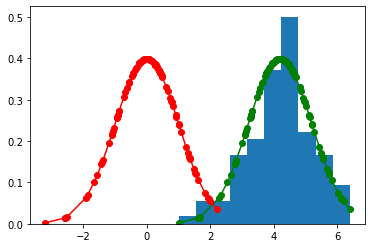

In [85]:
y_sorted = sorted(y)
fit = stats.norm.pdf(y_sorted, mu, scale)  

plt.plot(y_sorted,fit,'-o', color='green')
plt.plot([i - mu for i in y_sorted],fit,'-o', color='red')
plt.hist(y_sorted, density=True)      

mu just shifted the noise to a new center. But this is non-trivial because it defines a new state of information/entropy. 

As we learn from data we combine assumptions (model!) with evidence (data!) to make inference (description of a state of information).

If we up the number of draws we can get closer and closer to the normal pdf

(array([0.00316552, 0.01692866, 0.07748648, 0.2152555 , 0.35563953,
        0.37132951, 0.22667891, 0.08657015, 0.0192684 , 0.00399131]),
 array([0.53168828, 1.25826668, 1.98484508, 2.71142349, 3.43800189,
        4.1645803 , 4.8911587 , 5.61773711, 6.34431551, 7.07089391,
        7.79747232]),
 <BarContainer object of 10 artists>)

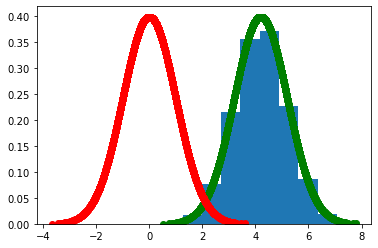

In [86]:
y = my_rng.normal(loc=mu, scale=scale, size=10000)
y_sorted = sorted(y)
fit = stats.norm.pdf(y_sorted, mu, scale)  

plt.plot(y_sorted,fit,'-o', color='green')
plt.plot([i - mu for i in y_sorted],fit,'-o', color='red')
plt.hist(y_sorted, density=True,)   

Try out the different distribution functions in scipy that are listed on pages 275-282 in SC:P3H4MJ

Note that the discussion of generating numpy in the book still works but is frowned upon now as the way we walked through in this notebook leads to more random pseudo-random numbers.